In [1]:
%pylab inline
%matplotlib inline 
import pandas as pd
import gsw
import netCDF4 as nc
import xarray as xr 
import pylab as plt
import scipy.io
import math
import numpy.matlib

from scipy import stats 


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy import interpolate

In [3]:
path='C:/Users/Thape/Downloads/SCALE related/500m_dMn_Distribution_win.xlsx'
winter_data=pd.read_excel(path)
winter_data

,Station,Lat,Long,"Date, time",depth,Potential temperature,Practical salinity,oxygen_insitu (mL/L),oxygen_saturation (%),apparent_oxygen_utilisation (mL/L),...,NO3 (uM),SiO4 (uM),PO4 (uM),MLD (m),dMn,error,56 Fe (nmol/kg),Unnamed: 18,66 Zn (nmol/kg),Unnamed: 20
0,GT1,-55.980000,0.00000,2019-07-25,25,-1.820730,33.851931,9.386302,112.760161,-1.062172,...,29.094201,54.077906,1.978205,83±17,0.465290,0.008918,0.090484,0.025225,3.436547,0.070477
1,GT1,-55.980000,0.00000,2019-07-25,50,-1.817355,33.852231,9.364968,112.524839,-1.042390,...,29.044426,55.350000,1.981410,83±17,0.482979,0.018497,0.165057,0.052617,3.820459,0.220076
2,GT1,-55.980000,0.00000,2019-07-25,75,-1.814481,33.852281,9.367643,112.246504,-1.022044,...,28.883027,54.046024,1.983814,83±17,0.517476,0.050697,0.144724,0.014377,3.731906,0.252902
3,GT1,-55.980000,0.00000,2019-07-25,100,-1.804409,33.854180,9.283511,111.013654,-0.921016,...,30.493369,60.038443,1.984615,83±17,0.444187,0.016001,0.061221,0.041479,4.047959,0.136594
4,GT1,-55.980000,0.00000,2019-07-25,150,-1.777786,33.856680,7.582465,93.820475,0.499422,...,31.650584,63.721119,2.102564,83±17,0.493657,0.000522,0.212098,0.010739,5.878567,0.716056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,MIZ2,-57.319217,0.01415,2019-07-27,200,15.606878,35.430906,3.419435,43.603381,4.422697,...,33.237570,95.871169,2.222436,119.825,0.568100,0.011900,0.626400,0.004442,7.459800,0.050200
150,MIZ2,-57.319217,0.01415,2019-07-27,250,15.939963,35.476144,3.414419,43.508403,4.433304,...,33.702368,96.424867,2.278205,119.825,0.384400,0.002073,0.664400,0.005488,5.966600,0.100000
151,MIZ2,-57.319217,0.01415,2019-07-27,300,16.019353,35.479293,3.387734,43.183841,4.457178,...,33.605519,100.058254,2.283013,119.825,0.419500,0.003779,0.743800,0.001282,7.108000,0.015000
152,MIZ2,-57.319217,0.01415,2019-07-27,400,16.021490,35.479643,3.369744,42.882874,4.488274,...,33.827275,105.834755,2.206410,119.825,0.409100,0.002385,0.861300,0.008406,13.334700,0.062100


In [4]:
Depth_GT1=winter_data.depth[0:18]
Depth_GT2=winter_data.depth[19:37]
Depth_GT3=winter_data.depth[38:56]
Depth_GT6=winter_data.depth[57:75]
Depth_GT7=winter_data.depth[76:95]
Depth_GT9=winter_data.depth[96:115]
Depth_GT10=winter_data.depth[116:133]
Depth_MIZ1=winter_data.depth[134:143]
Depth_MIZ2=winter_data.depth[144:153]


dMn_GT1=winter_data.dMn[0:18]
e1=winter_data.error[0:18]
dMn_GT2=winter_data.dMn[19:37]
e2=winter_data.error[19:37]
dMn_GT3=winter_data.dMn[38:56]
e3=winter_data.error[38:56]
dMn_GT6=winter_data.dMn[57:75]
e6=winter_data.error[57:75]
dMn_GT7=winter_data.dMn[76:95]
e7=winter_data.error[76:95]
dMn_GT9=winter_data.dMn[96:115]
e9=winter_data.error[96:115]
dMn_GT10=winter_data.dMn[116:133]
e10=winter_data.error[116:133]
dMn_MIZ1=winter_data.dMn[134:143]
emiz1=winter_data.error[134:143]
dMn_MIZ2=winter_data.dMn[144:153]
emiz2=winter_data.error[144:153]




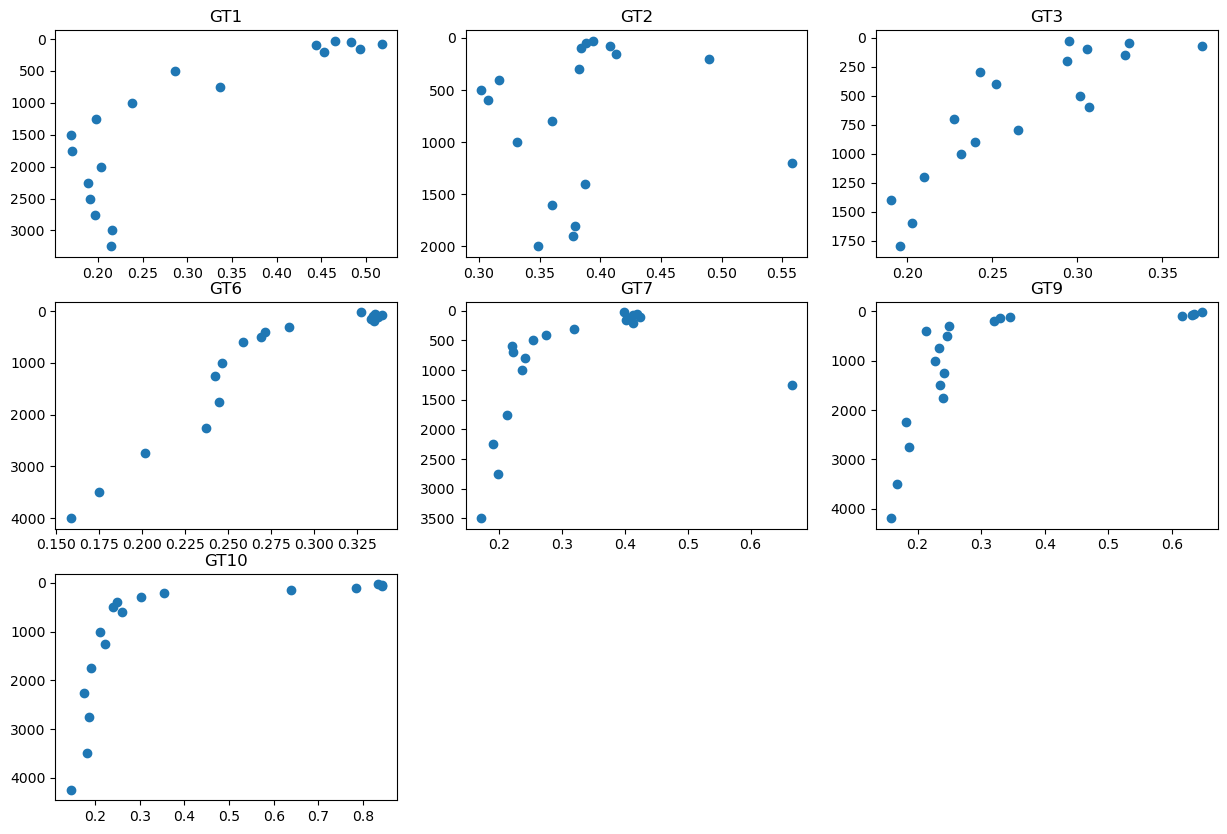

In [5]:
plt.rcParams['font.size'] = 10
plt.figure(figsize=[15,10])
plt.rcParams['lines.linewidth'] = 3

plt.subplot(3,3,1)
plt.scatter(dMn_GT1, Depth_GT1)
plt.gca().invert_yaxis()
plt.title('GT1')
plt.subplot(3,3,2)
plt.scatter(dMn_GT2, Depth_GT2)
plt.gca().invert_yaxis()
plt.title('GT2')
            
plt.subplot(3,3,3)
plt.scatter(dMn_GT3, Depth_GT3)
plt.gca().invert_yaxis()
plt.title('GT3')

plt.subplot(3,3,4)
plt.scatter(dMn_GT6, Depth_GT6)
plt.gca().invert_yaxis()
plt.title('GT6')

plt.subplot(3,3,5)
plt.scatter(dMn_GT7, Depth_GT7)
plt.gca().invert_yaxis()
plt.title('GT7')
            
plt.subplot(3,3,6)
plt.scatter(dMn_GT9, Depth_GT9)
plt.gca().invert_yaxis()
plt.title('GT9')

plt.subplot(3,3,7)
plt.scatter(dMn_GT10, Depth_GT10)
plt.gca().invert_yaxis()
plt.title('GT10')



plt.savefig('winter_vertical_Profile.png')

In [6]:
path2='C:/Users/Thape/OneDrive/Desktop/PhD/SCALE_2019/SCALE  2019_SPRING\Spring_Sorted_CTD.xlsx'

In [7]:
path2

'C:/Users/Thape/OneDrive/Desktop/PhD/SCALE_2019/SCALE  2019_SPRING\\Spring_Sorted_CTD.xlsx'

In [8]:
spring_data=pd.read_excel('C:/Users/Thape/OneDrive/Desktop/PhD/SCALE_2019/SCALE  2019_SPRING\\Spring_Sorted_CTD.xlsx')
spring_data

,Latitude,Longitude,"Date, time",Station,depth,dMn,oxygen_insitu (mL/L),oxygen_saturation (%),apparent_oxygen_utilisation (mL/L),AOU (umol/L),...,63 Cu (nmol/kg),Unnamed: 28,66 Zn (nmol/kg),Unnamed: 30,111 Cd (pmol/kg),Unnamed: 32,112 Cd (pmol/kg),Unnamed: 34,208 Pb (pmol/kg),Unnamed: 36
0,-55.99,0.0,2019-11-08,GT1,25.243,0.390834,6.877613,81.469379,1.564348,48.582227,...,1.963018,0.027520,5.223115,0.861136,727.467282,1.851420,708.102368,8.730958,7.268531,1.520897
1,-55.99,0.0,2019-11-08,GT1,47.945,0.417571,6.788930,80.425543,1.652331,51.314626,...,1.974346,0.034984,7.861740,1.439994,744.692812,7.342934,730.488964,2.349406,7.036591,0.514734
2,-55.99,0.0,2019-11-08,GT1,72.721,0.462606,6.611745,78.783659,1.780535,55.296113,...,1.995187,0.023113,5.958919,0.181810,761.466032,1.699466,751.675072,6.933813,6.206385,0.009645
3,-55.99,0.0,2019-11-08,GT1,99.065,0.466223,6.336276,76.199663,1.979084,61.462224,...,2.004007,0.008454,5.309207,0.040000,787.106248,2.692145,763.928912,6.122909,5.749023,0.121921
4,-55.99,0.0,2019-11-08,GT1,147.708,0.450046,5.874926,71.733423,2.315016,71.894920,...,2.130067,0.017041,6.354259,0.232652,819.302835,22.880988,807.117147,15.699264,6.255683,0.288585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,-36.30,13.3,2019-11-18,GT10,1679.592,0.233351,4.308709,57.695136,3.159354,98.116580,...,1.790137,0.002762,4.813218,0.016000,807.782948,4.757261,808.617178,11.208071,9.212377,0.508698
144,-36.30,13.3,2019-11-18,GT10,1973.396,0.225586,4.525842,60.420775,2.964697,92.071343,...,1.807493,0.037520,4.491228,0.030172,734.921567,22.412281,725.028852,19.422385,10.919438,0.655347
145,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,NaN,NaN,NaT,NaN,NaN,0.339683,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
Depth_GT1s=spring_data.depth[0:14]
Depth_GT2s=spring_data.depth[15:28]
Depth_GT3s=spring_data.depth[29:43]
Depth_GT4s=spring_data.depth[44:57]
Depth_GT5s=spring_data.depth[58:69]
Depth_GT6s=spring_data.depth[70:84]
Depth_GT7s=spring_data.depth[85:99]
Depth_GT8s=spring_data.depth[100:114]
Depth_GT9s=spring_data.depth[115:129]
Depth_GT10s=spring_data.depth[130:144]



dMn_GT1s=spring_data.dMn[0:14]
e1s=spring_data.error[0:14]
dMn_GT2s=spring_data.dMn[15:28]
e2s=spring_data.error[15:28]
dMn_GT3s=spring_data.dMn[29:43]
e3s=spring_data.error[29:43]
dMn_GT4s=spring_data.dMn[44:57]
e4s=spring_data.error[44:57]
dMn_GT5s=spring_data.dMn[58:69]
e5s=spring_data.error[58:69]
dMn_GT6s=spring_data.dMn[70:84]
e6s=spring_data.error[70:84]
dMn_GT7s=spring_data.dMn[85:99]
e7s=spring_data.error[85:99]
dMn_GT8s=spring_data.dMn[100:114]
e8s=spring_data.error[100:114]
dMn_GT9s=spring_data.dMn[115:129]
e9s=spring_data.error[115:129]
dMn_GT10s=spring_data.dMn[130:144]
e10s=spring_data.error[130:144]


In [10]:
import scipy.stats as stats

# Concentration values for winter and spring
winter_concentrations = [55.64,
53.77044984,
76.8601314,
75.94734476]

spring_concentrations = [60.79359514,
53.73786729,
77.05672101,
75.96244469]


# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(winter_concentrations, spring_concentrations)

# Print p-value
print("p-value:", p_value)


p-value: 0.8806353724687412


In [11]:
import numpy as np

# Sample data
data = np.array([54.31,
53.73,
76.86,
75.93
])

# Calculate the mean
mean = np.mean(data)

# Calculate the squared differences from the mean
squared_diff = (data - mean) ** 2

# Calculate the variance
variance = np.mean(squared_diff)

print("Variance:", variance)


Variance: 125.31031875000004


In [12]:
sum(spring_data.dMn)


49.785792553418275

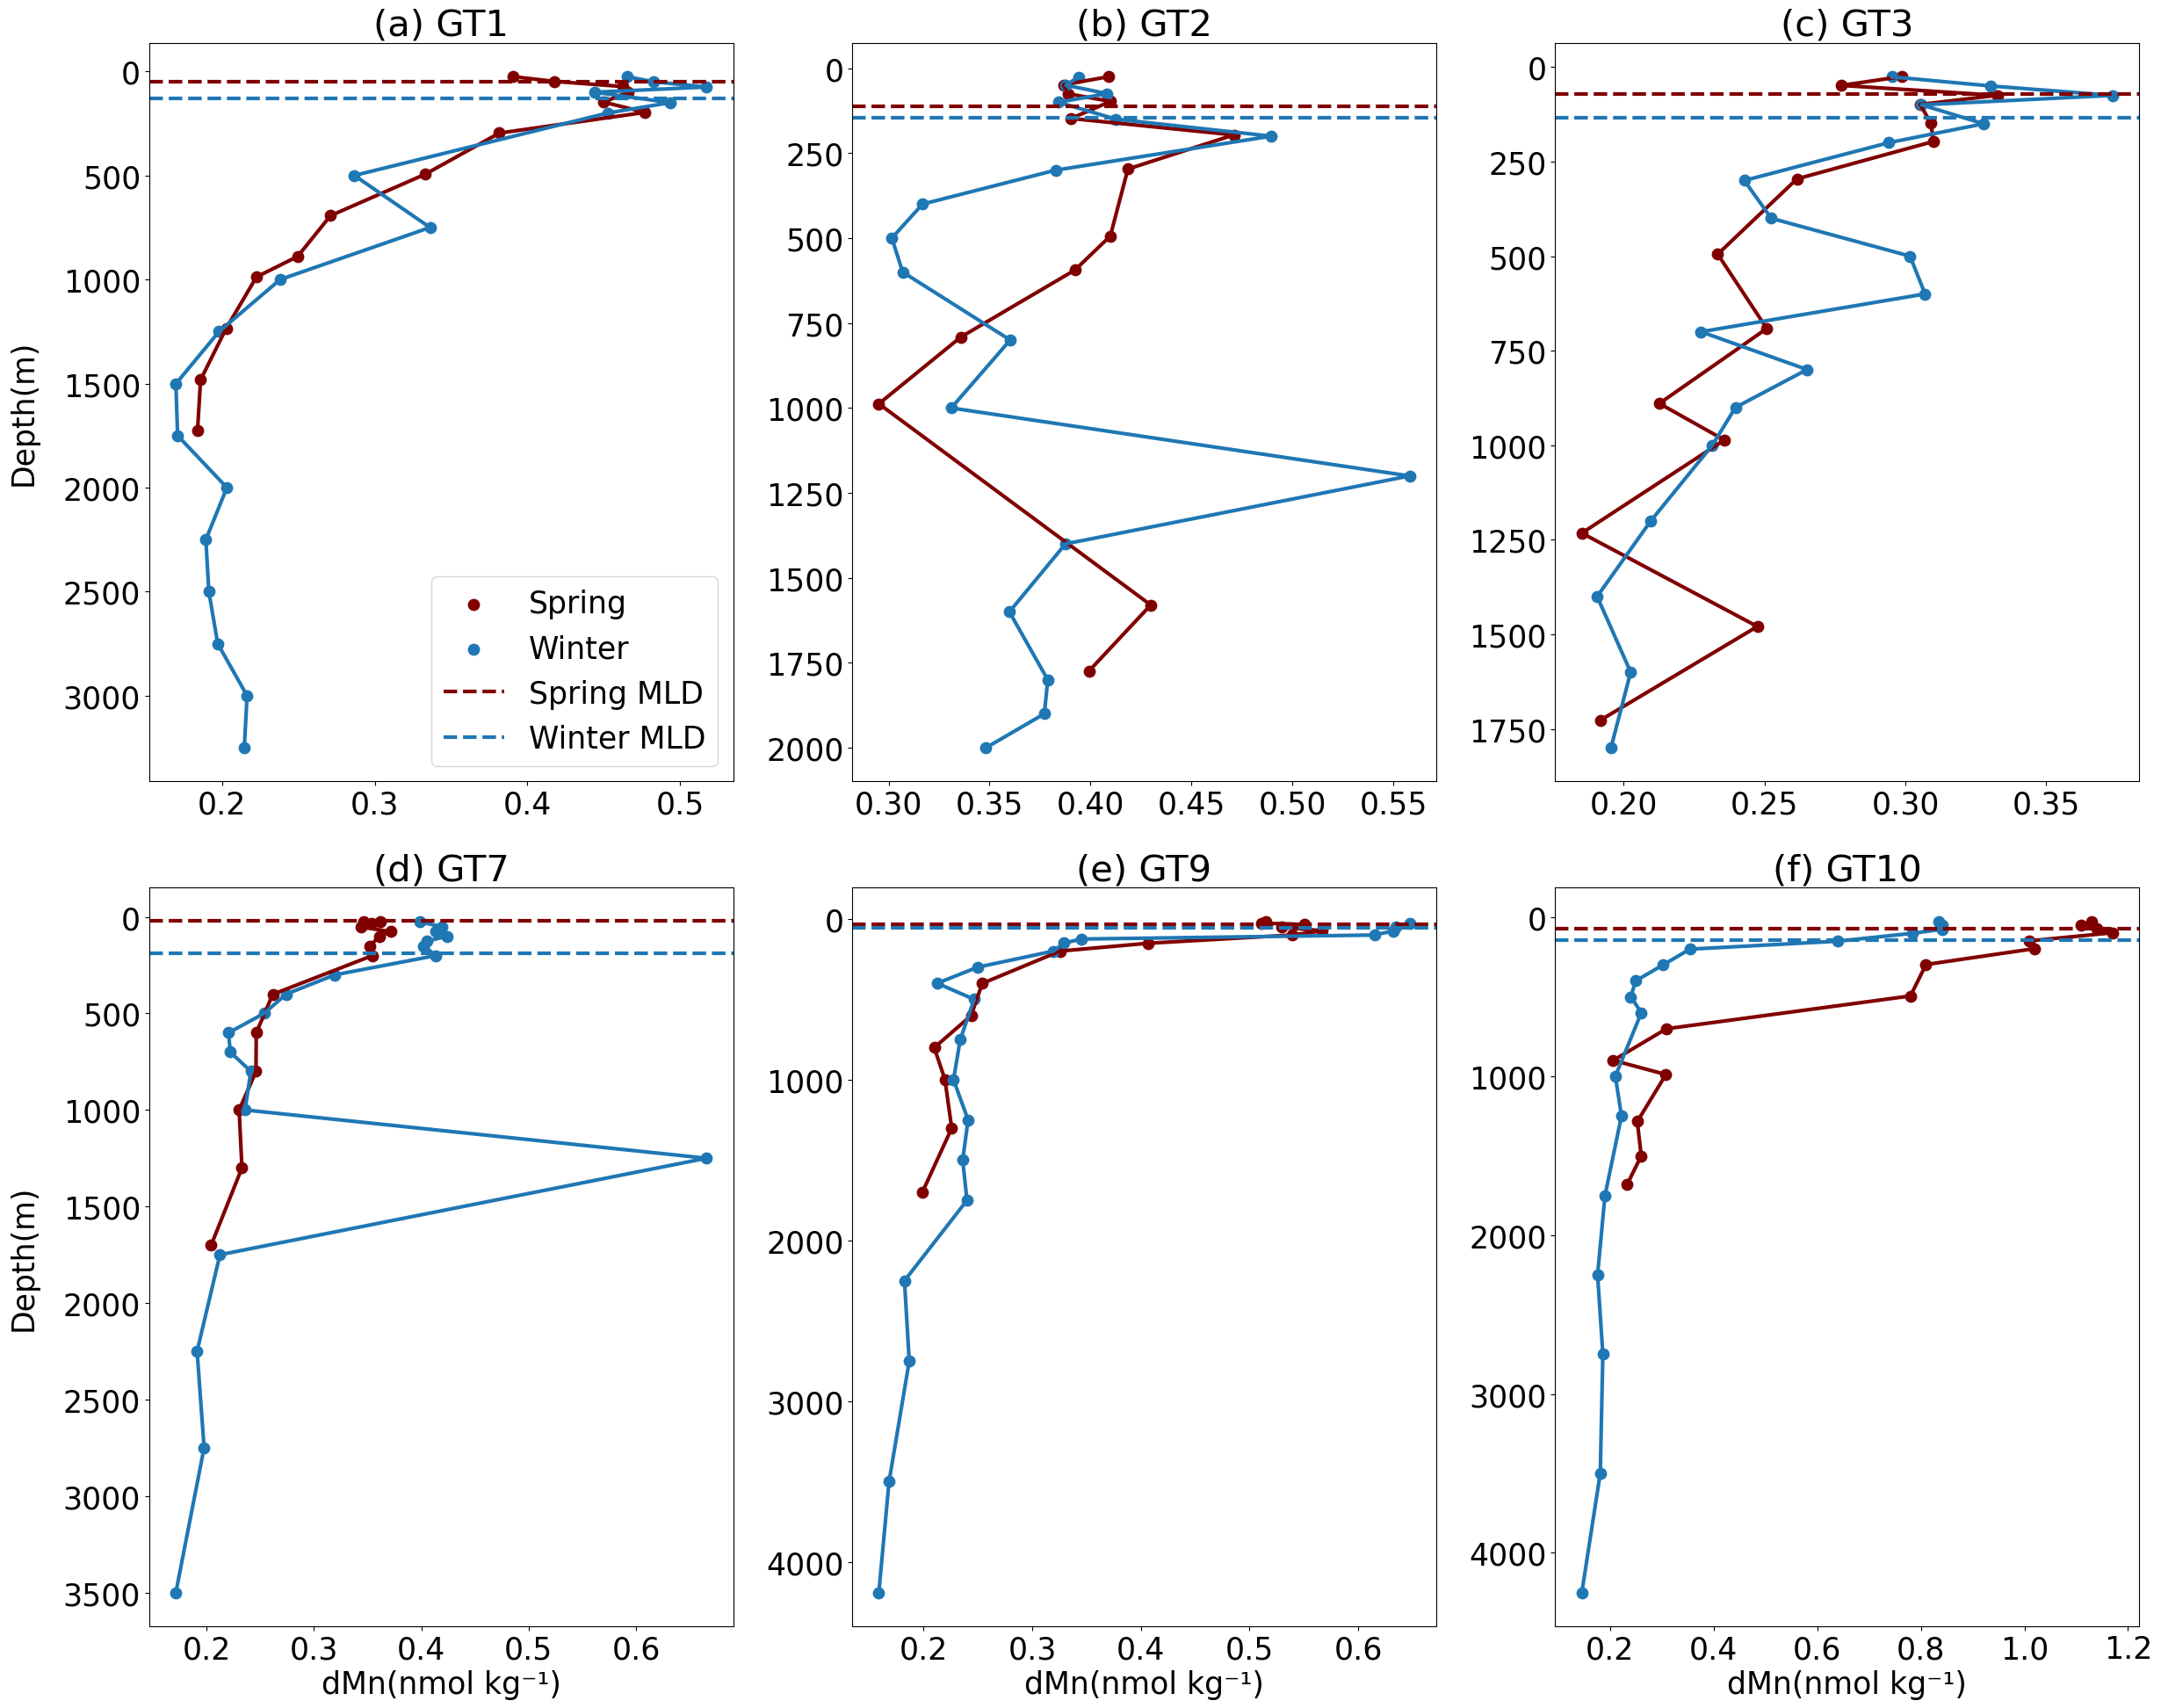

In [13]:
plt.rcParams['font.size'] = 25
plt.figure(figsize=[25,20])
plt.rcParams['lines.linewidth'] = 3

plt.subplot(2,3,1)
plt.scatter(dMn_GT1s, Depth_GT1s, s=80, color = 'maroon',label='Spring')
plt.plot(dMn_GT1s, Depth_GT1s, linestyle='-',color = 'maroon')
plt.scatter(dMn_GT1, Depth_GT1, s=80,label='Winter')
plt.plot(dMn_GT1, Depth_GT1, linestyle='-')
plt.gca().invert_yaxis()
#plt.legend(loc='lower right')
plt.axhline(y=49.54, color= 'maroon', linestyle='--',label='Spring MLD')
plt.axhline(y=130, linestyle='--',label='Winter MLD')
plt.legend(loc='lower right')
plt.title('(a) GT1')
plt.ylabel('Depth(m)', labelpad=20)


plt.subplot(2,3,2)
plt.scatter(dMn_GT2s, Depth_GT2s, s=80, color = 'maroon',label='Spring')
plt.plot(dMn_GT2s, Depth_GT2s, linestyle='-',color = 'maroon')
plt.scatter(dMn_GT2, Depth_GT2, s=80,label='Winter')
plt.plot(dMn_GT2, Depth_GT2, linestyle='-')
plt.gca().invert_yaxis()
plt.axhline(y=111.96, color= 'maroon', linestyle='--')
plt.axhline(y=147, linestyle='--')
#plt.legend()
plt.title('(b) GT2')
            
plt.subplot(2,3,3)
plt.scatter(dMn_GT3s, Depth_GT3s,color = 'maroon', s=80)
plt.plot(dMn_GT3s, Depth_GT3s, linestyle='-',color = 'maroon')
plt.scatter(dMn_GT3, Depth_GT3, s=80)
plt.plot(dMn_GT3, Depth_GT3, linestyle='-')
plt.gca().invert_yaxis()
plt.axhline(y=70.37, color= 'maroon', linestyle='--')
plt.axhline(y=133, linestyle='--')
plt.title('(c) GT3')


plt.subplot(2,3,4)
plt.scatter(dMn_GT7s, Depth_GT7s,color = 'maroon', s=80)
plt.plot(dMn_GT7s, Depth_GT7s, linestyle='-',color = 'maroon')
plt.scatter(dMn_GT7, Depth_GT7, s=80)
plt.plot(dMn_GT7, Depth_GT7, linestyle='-')
plt.gca().invert_yaxis()
plt.axhline(y=18.85, color= 'maroon', linestyle='--')
plt.axhline(y=187.42, linestyle='--')
plt.title('(d) GT7')
plt.ylabel('Depth(m)', labelpad=20)
#plt.title('GT7')
plt.xlabel('dMn(nmol kg\u207B\u00B9)')

            
plt.subplot(2,3,5)
plt.scatter(dMn_GT9s, Depth_GT9s,color = 'maroon', s=80)
plt.plot(dMn_GT9s, Depth_GT9s, linestyle='-',color = 'maroon')
plt.scatter(dMn_GT9, Depth_GT9, s=80)
plt.plot(dMn_GT9, Depth_GT9, linestyle='-')
plt.gca().invert_yaxis()
plt.axhline(y=30.76, color= 'maroon', linestyle='--')
plt.axhline(y=55, linestyle='--')
plt.title('(e) GT9')
#plt.title('GT9')
plt.xlabel('dMn(nmol kg\u207B\u00B9)')

plt.subplot(2,3,6)
plt.scatter(dMn_GT10s, Depth_GT10s,color = 'maroon', s=80)
plt.plot(dMn_GT10s, Depth_GT10s, linestyle='-',color = 'maroon')
plt.scatter(dMn_GT10, Depth_GT10, s=80)
plt.plot(dMn_GT10, Depth_GT10, linestyle='-')
plt.gca().invert_yaxis()
plt.axhline(y=71.46, color= 'maroon', linestyle='--')
plt.axhline(y=141.9, linestyle='--')
plt.title('(f) GT10')
plt.xlabel('dMn(nmol kg\u207B\u00B9)')
plt.tight_layout()
plt.savefig('Spring_vertical_Profile2.png')


AttributeError: 'function' object has no attribute 'line'

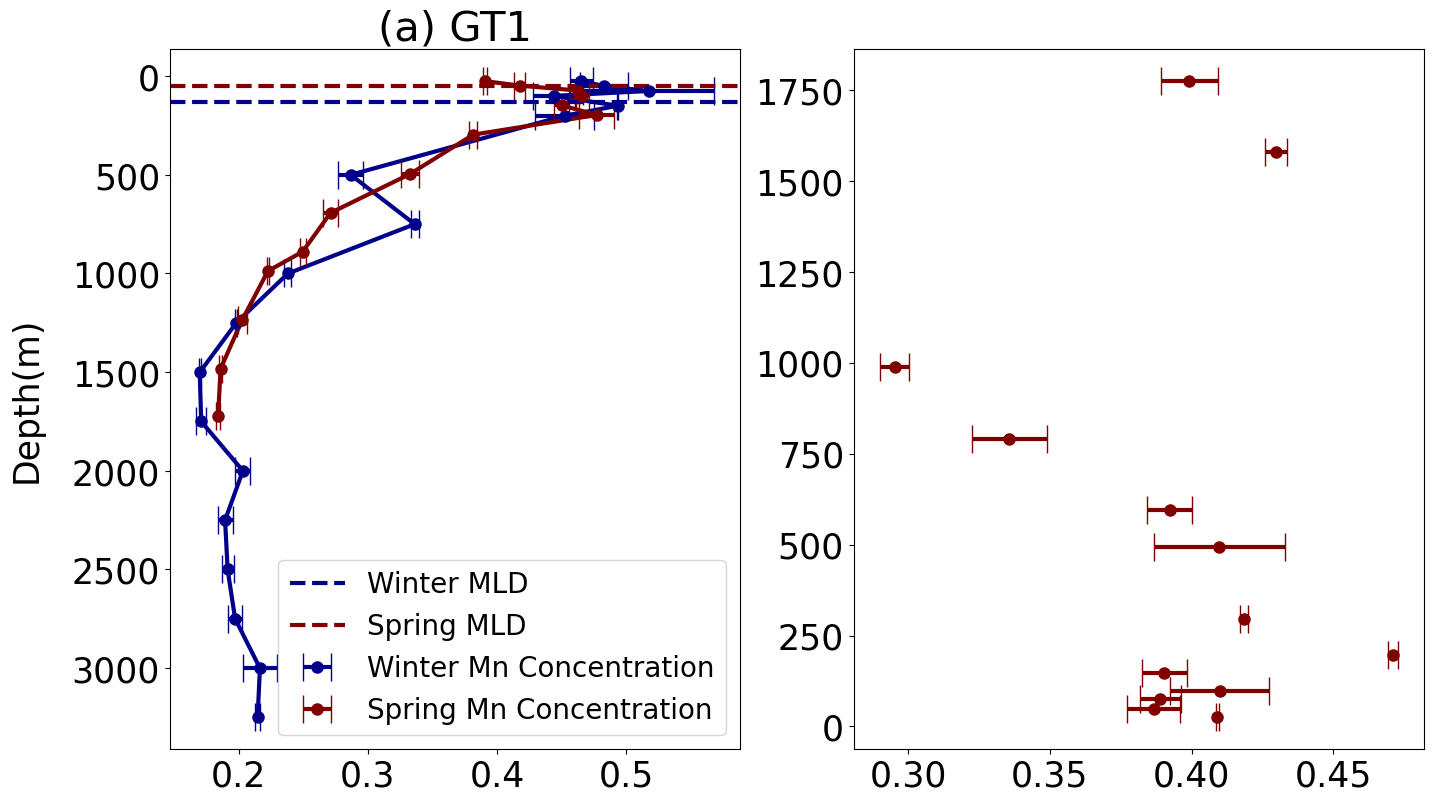

In [14]:
plt.rcParams['font.size'] = 25
plt.figure(figsize=[25,20])
plt.rcParams['lines.linewidth'] = 3

plt.subplot(2,3,1)
#plt.scatter(dMn_GT1s, Depth_GT1s, s=80, color = 'maroon',label='Spring')


plt.errorbar(dMn_GT1, Depth_GT1, xerr=e1, fmt='o', markersize=8, capsize=10, label='Winter Mn Concentration',color='darkblue')
plt.plot(dMn_GT1, Depth_GT1, linestyle='-', color='darkblue')
plt.errorbar(dMn_GT1s, Depth_GT1s, xerr=e1s, fmt='o', color='maroon', markersize=8, capsize=10, label='Spring Mn Concentration')

plt.plot(dMn_GT1s, Depth_GT1s, linestyle='-',color = 'maroon')
plt.gca().invert_yaxis()
#plt.legend(loc='lower right')
plt.axhline(y=130, linestyle='--',label='Winter MLD',color='darkblue')
plt.axhline(y=49.54, color= 'maroon', linestyle='--',label='Spring MLD')

plt.legend(loc='lower right',fontsize=20)
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
#plt.legend(frameon=False) 
plt.title('(a) GT1')
plt.ylabel('Depth(m)', labelpad=20)


plt.subplot(2,3,2)

plt.errorbar(dMn_GT2s, Depth_GT2s, xerr=e2s, fmt='o', color='maroon', markersize=8, capsize=10, label='Spring')

plt.plot.line(dMn_GT2s, Depth_GT2s, linestyle='-',color = 'maroon')
plt.errorbar(dMn_GT2, Depth_GT2, xerr=e2, fmt='o', markersize=8, capsize=10, label='Winter',color='darkblue')
plt.plot(dMn_GT2, Depth_GT2, linestyle='-',color='darkblue')
plt.gca().invert_yaxis()
plt.axhline(y=111.96, color= 'maroon', linestyle='--')
plt.axhline(y=147, linestyle='--',color='darkblue')
#plt.legend()
plt.title('(b) GT2')
            
plt.subplot(2,3,3)
plt.errorbar(dMn_GT3s, Depth_GT3s, xerr=e3s, fmt='o', color='maroon', markersize=8, capsize=10)
plt.plot(dMn_GT3s, Depth_GT3s, linestyle='-',color = 'maroon')
plt.errorbar(dMn_GT3, Depth_GT3, xerr=e3, fmt='o', markersize=8, capsize=10,color='darkblue')
plt.plot(dMn_GT3, Depth_GT3, linestyle='-',color='darkblue')
plt.gca().invert_yaxis()
plt.axhline(y=70.37, color= 'maroon', linestyle='--')
plt.axhline(y=133, linestyle='--',color='darkblue')
plt.title('(c) GT3')


plt.subplot(2,3,4)
plt.errorbar(dMn_GT7s, Depth_GT7s, xerr=e7s, fmt='o', color='maroon', markersize=8, capsize=10)
plt.plot(dMn_GT7s, Depth_GT7s, linestyle='-',color = 'maroon')
plt.errorbar(dMn_GT7, Depth_GT7, xerr=e7, fmt='o', markersize=8, capsize=10,color='darkblue')
plt.plot(dMn_GT7, Depth_GT7, linestyle='-',color='darkblue')
plt.gca().invert_yaxis()
plt.axhline(y=18.85, color= 'maroon', linestyle='--')
plt.axhline(y=187.42, linestyle='--',color='darkblue')
plt.title('(d) GT7')
plt.ylabel('Depth(m)', labelpad=20)
#plt.title('GT7')
plt.xlabel('dMn(nmol kg\u207B\u00B9)')

            
plt.subplot(2,3,5)
plt.errorbar(dMn_GT9s, Depth_GT9s, xerr=e9s, fmt='o', color='maroon', markersize=8, capsize=10)
plt.plot(dMn_GT9s, Depth_GT9s, linestyle='-',color = 'maroon')
plt.errorbar(dMn_GT9, Depth_GT9, xerr=e9, fmt='o', markersize=8, capsize=10,color='darkblue')
plt.plot(dMn_GT9, Depth_GT9, linestyle='-',color='darkblue')
plt.gca().invert_yaxis()
plt.axhline(y=30.76, color= 'maroon', linestyle='--')
plt.axhline(y=55, linestyle='--',color='darkblue')
plt.title('(e) GT9')
#plt.title('GT9')
plt.xlabel('dMn(nmol kg\u207B\u00B9)')

plt.subplot(2,3,6)
plt.errorbar(dMn_GT10s, Depth_GT10s, xerr=e10s, fmt='o', color='maroon', markersize=8, capsize=10)
plt.plot(dMn_GT10s, Depth_GT10s, linestyle='-',color = 'maroon')
plt.errorbar(dMn_GT10, Depth_GT10, xerr=e10, fmt='o', markersize=8, capsize=10,color='darkblue')
plt.plot(dMn_GT10, Depth_GT10, linestyle='-',color='darkblue')
plt.gca().invert_yaxis()
plt.axhline(y=71.46, color= 'maroon', linestyle='--')
plt.axhline(y=141.9, linestyle='--',color='darkblue')
plt.title('(f) GT10')
plt.xlabel('dMn(nmol kg\u207B\u00B9)')
plt.tight_layout()
plt.savefig('Spring_vertical_Profile2.png')

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Create a scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter Plot Example')

# Show the plot
plt.show()

In [ ]:
plt.rcParams['font.size'] = 10
plt.figure(figsize=[15,10])
plt.rcParams['lines.linewidth'] = 3

plt.subplot(3,4,1)
plt.scatter(dMn_GT1s, Depth_GT1s, color = 'maroon')
plt.scatter(dMn_GT1, Depth_GT1)
plt.gca().invert_yaxis()
plt.title('GT1')

plt.subplot(3,4,2)
plt.scatter(dMn_GT2s, Depth_GT2s, color = 'maroon')
plt.scatter(dMn_GT2, Depth_GT2)
plt.gca().invert_yaxis()
plt.title('GT2')
            
plt.subplot(3,4,3)
plt.scatter(dMn_GT3s, Depth_GT3s,color = 'maroon')
plt.scatter(dMn_GT3, Depth_GT3)
plt.gca().invert_yaxis()
plt.title('GT3')

plt.subplot(3,4,4)
plt.scatter(dMn_GT4s, Depth_GT4s,color = 'maroon')
#plt.scatter(dMn_GT4, Depth_GT4)
plt.gca().invert_yaxis()
plt.title('GT4')

plt.subplot(3,4,5)
plt.scatter(dMn_GT5s, Depth_GT5s,color = 'maroon')
#plt.scatter(dMn_GT5, Depth_GT5)
plt.gca().invert_yaxis()
plt.title('GT5')

plt.subplot(3,4,6)
plt.scatter(dMn_GT6s, Depth_GT6s,color = 'maroon')
#plt.scatter(dMn_GT6, Depth_GT6)
plt.gca().invert_yaxis()
plt.title('GT6')

plt.subplot(3,4,7)
plt.scatter(dMn_GT7s, Depth_GT7s,color = 'maroon')
plt.scatter(dMn_GT7, Depth_GT7)
plt.gca().invert_yaxis()
plt.title('GT7')

plt.subplot(3,4,8)
plt.scatter(dMn_GT8s, Depth_GT8s,color = 'maroon')
#plt.scatter(dMn_GT8, Depth_GT8)
plt.gca().invert_yaxis()
plt.title('GT8')
            
plt.subplot(3,4,9)
plt.scatter(dMn_GT9s, Depth_GT9s,color = 'maroon')
plt.scatter(dMn_GT9, Depth_GT9)
plt.gca().invert_yaxis()
plt.title('GT9')

plt.subplot(3,4,10)
plt.scatter(dMn_GT10s, Depth_GT10s,color = 'maroon')
plt.scatter(dMn_GT10, Depth_GT10)
plt.gca().invert_yaxis()
plt.title('GT10')

plt.tight_layout()
#plt.savefig('Spring_vertical_Profile.png')
